# Descubra quem fez o ENEM 2016 apenas para treino.
**Autor**: Diego Luiz (dluiz815@gmail.com)

# Importação das bibliotecas

In [23]:
import functools
# Computação científica e manipulação de dados.
import pandas as pd
import numpy as np

# Visualização e Gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem de dados.
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Machine Learning.
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Algumas configuraçãoes do Matplotlib
plt.rc("figure", figsize=(10, 6))
sns.set(style="dark", palette="Accent")

# Importandos os dados

In [3]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv").drop(columns="NU_INSCRICAO")

In [4]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
df_test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,43,RS,19,F,1,1,1,3,1,NaN,...,NaN,NaN,E,E,H,B,B,C,D,A
1,15,PA,24,M,3,2,1,4,1,NaN,...,NaN,NaN,B,C,B,A,A,C,D,A
2,29,BA,16,F,2,1,3,0,1,NaN,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,480.0,E,E,E,C,B,B,C,A
4,53,DF,19,F,1,1,1,1,1,NaN,...,80.0,720.0,E,E,E,B,B,B,D,A


# Selecionando as Features no Data Frame de Treino.

In [6]:
# Limitando o data frame de treino às features disponíveis nos dados de teste.
features = df_test.columns.to_list()

df_train = df_train[features + ["IN_TREINEIRO"]]

In [7]:
df_train.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

# Missing Values nos Dados de TESTE

In [8]:
def plota_nulos(df, titulo):
    nans = df.isna().sum()
    
    plt.figure(figsize=(15, 16))
    plt.barh(y=nans.index, width=nans.values)
    for indice, valor in enumerate(nans):
        plt.text(valor + 5, indice - 0.25, "{}%".format(round(valor * 100/ df.shape[0], 0)))
    plt.title(titulo, fontsize=25)
    plt.xlabel("Quantidade de Valores Faltantes", fontsize=18)
    plt.ylabel("Features", fontsize=18)
    plt.grid(True)

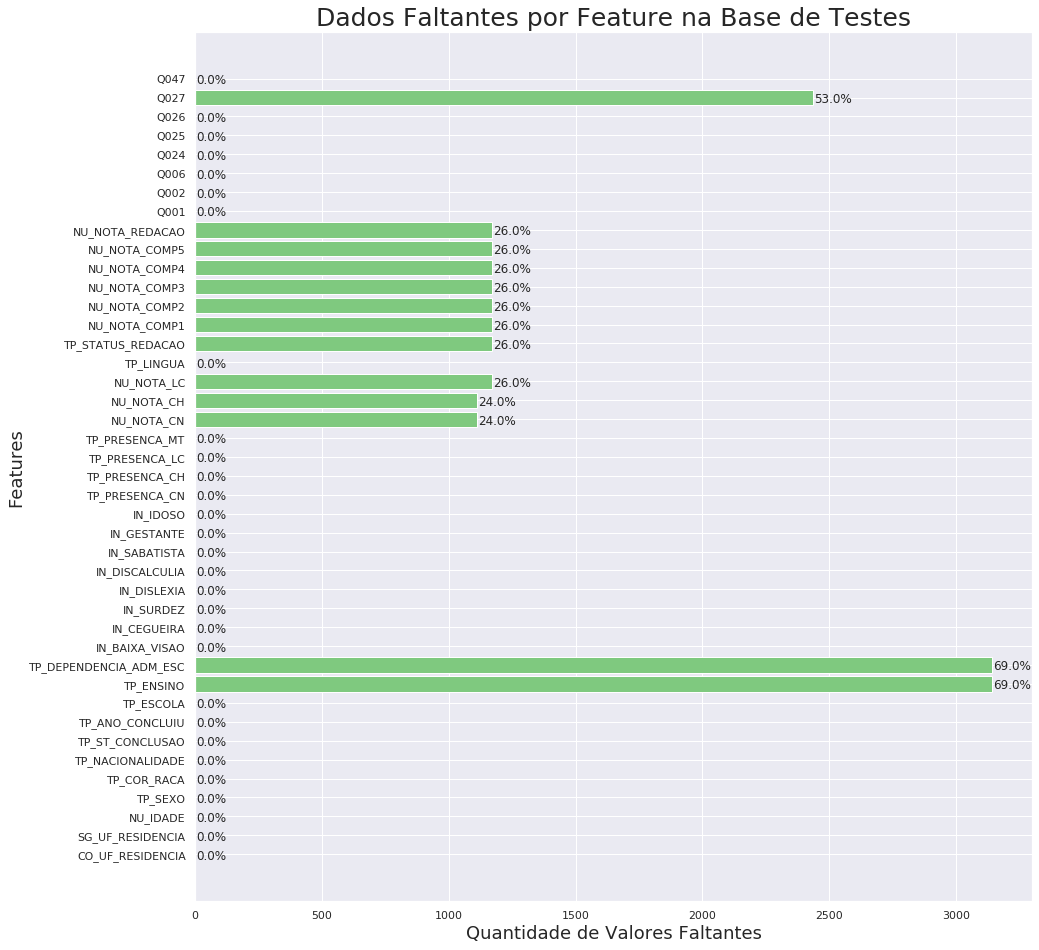

In [9]:
plota_nulos(df_test, "Dados Faltantes por Feature na Base de Testes")

# Missing Values nos Dados de TREINO

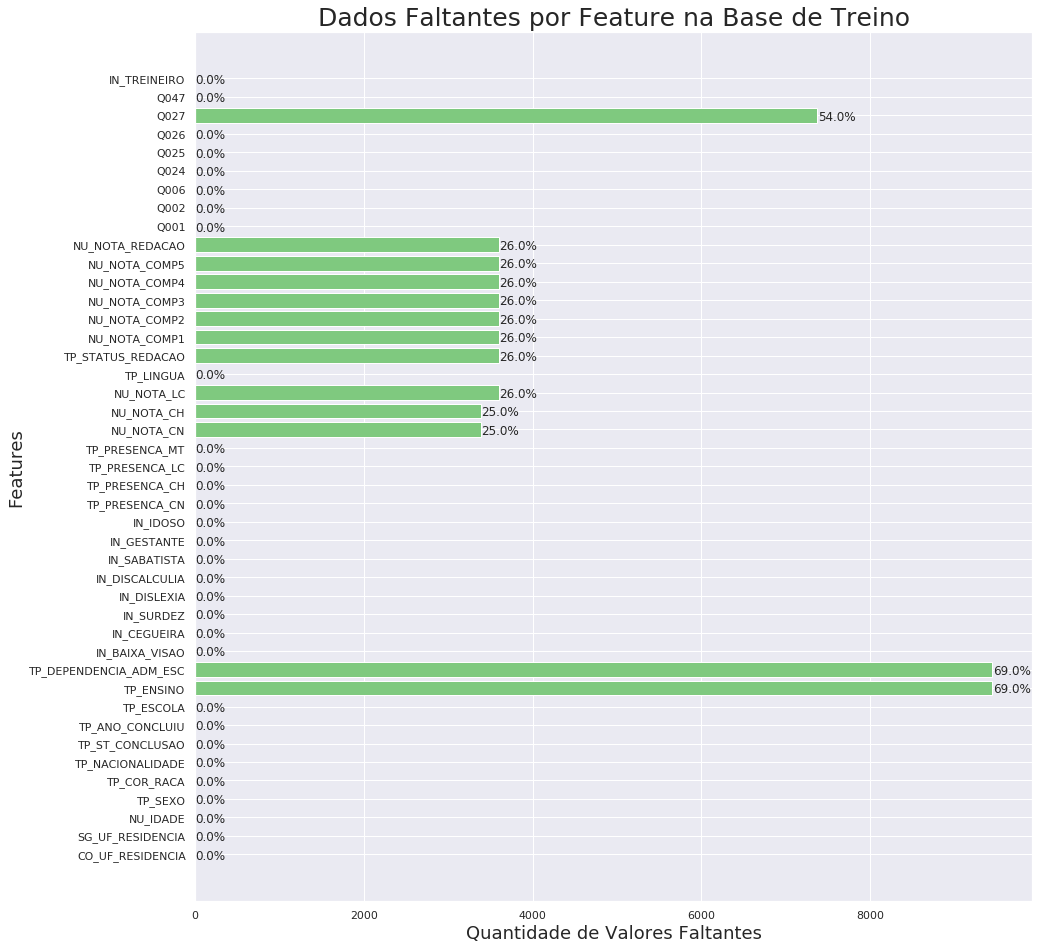

In [10]:
plota_nulos(df_train, "Dados Faltantes por Feature na Base de Treino")

### Conclusões a cerca dos valores faltantes nos dados de treino e teste:
- Não há valores faltantes na nossa variável alvo IN_TRENEIRO;
- As features com dados faltantes são exatamente as mesmas nas duas bases de dados e na mesm proporção.

# O que fazer com os valores faltantes?
> - Iremos eliminar as features com mais de 50 % de dados faltantes, pois estas não tem informção signifcante para o modelo.
- As features que tiverem menos de 50 % de valores faltantes iremos preencher com -1.

In [11]:
# Excluindo as colunas com mais de 50% de dados faltantes.
df_test.drop(columns=["TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "Q027"], inplace=True)
df_train.drop(columns=["TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "Q027"], inplace=True)

In [12]:
# Preenchendo os demais valores faltantes com (-1).
df_test.fillna(-1, inplace=True)
df_train.fillna(-1, inplace=True)

In [13]:
# Verificando novamente valores vazios
print(f"Valores vazios ns dados de Teste: {df_test.isna().sum().sum()}")
print(f"Valores vazios ns dados de Treino: {df_train.isna().sum().sum()}")

Valores vazios ns dados de Teste: 0
Valores vazios ns dados de Treino: 0


# Verificando o Balanceamento das Classes (IN_TREINEIRO)

In [14]:
def plota_classes(classe):
    porcentagem_classe_0 = round(classe.value_counts(normalize=True).loc[0] * 100, 1)
    porcentagem_classe_1 = round(classe.value_counts(normalize=True).loc[1] * 100, 1)
    
    sns.countplot(classe)
    plt.title("Balanceamento das Classes", fontsize=25)
    plt.ylabel("Contagem", fontsize=18)
    plt.xlabel("Classes", fontsize=18)
    plt.ylim([0, 13000])
    
    plt.annotate(f"{porcentagem_classe_0} %", (0 - 0.08, classe.value_counts().loc[0] + 50), fontsize=20)
    plt.annotate(f"{porcentagem_classe_1} %", (1 - 0.08, classe.value_counts().loc[1] + 50), fontsize=20)
    plt.grid(True)

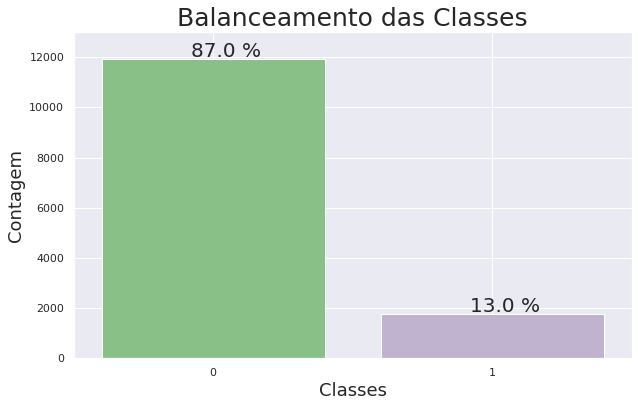

In [15]:
plota_classes(df_train["IN_TREINEIRO"])

Assim podemos ver claramente a maioria é da classe 0 (não-treineiro).

# Balanceando as Classes
Das técnicas existentes para balanceamento de dados, a que iremos utlizar será a de **oversampling**.
Utilzaremos o **SMOTE** (do pacote imblearn) para reamostrar os dados da classe minoritária e assim balancear nosso data set.

Contudo, antes iremos separar as variáveis explicativas da variável alvo.

In [16]:
x_train = df_train.drop(columns="IN_TREINEIRO", errors="ignore")
y_train = df_train["IN_TREINEIRO"]

x_test = df_test.copy()

In [17]:
# Features categóricas e numéricas.
siglas_categoricas = ["CO", "SG", "TP", "IN", "Q0"]
cat_features = [i for i in x_train.columns if i[:2] in siglas_categoricas]
num_features = x_train.columns.drop(cat_features)

### Encodando as variáveis categóricas com o One-Hot-Enconder.

In [18]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int)

ohe.fit(x_train[cat_features])

x_train_encoded = ohe.transform(x_train[cat_features])
x_test_encoded  = ohe.transform(df_test[cat_features])

x_train_encoded = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names(cat_features))
x_train_encoded = pd.concat([x_train_encoded, x_train[num_features].reset_index(drop=True)], axis=1)

x_test_encoded = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names(cat_features))
x_test_encoded = pd.concat([x_test_encoded, x_test[num_features].reset_index(drop=True)], axis=1)


In [19]:
smote = SMOTE(sampling_strategy="minority")

x_train_balanceado, y_train = smote.fit_resample(x_train_encoded, y_train)

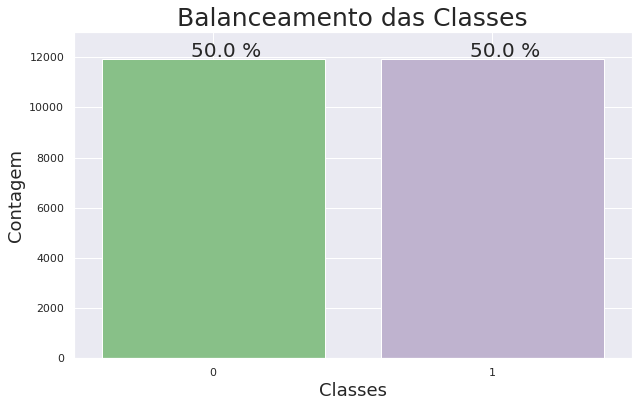

In [21]:
plota_classes(y_train)

 Agora que temos nossas classes balanceadas, podemos criar, treinar e predizer com nosso classificaro

# Classsificador: Random Forest.
Optei trabalhar com a **Random Forest**, principalmente, pelo fato de que neste modelo as variáveis numéricas não precisão ser pré-processadas (normalizar ou padronizar, nesse caso).

In [34]:
clf_RF = RandomForestClassifier()
clf_RF.fit(x_train_balanceado, y_train)
predict = clf_RF.predict(x_test_encoded)

In [38]:
predict = pd.Series(predict, name="IN_TREINEIRO")
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict], axis=1)
answer.to_csv("answer.csv", index=False)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


Resultado do nosso modelo reportado pela plataforma da Codenation:

**Score**: 99.69%

# Referências

- [Classification: Basic Concepts, Decision Trees, and Model Evaluation](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)
- [Having an Imbalanced Dataset? Here Is How You Can Fix It](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)
- [Foundations of Imbalanced Learning](https://pdfs.semanticscholar.org/1678/7e213ed0a5c0cf9baabdb45f9df631248a91.pdf)
- [Data Mining for Imbalanced Datasets: An Overview](https://www3.nd.edu/~dial/publications/chawla2005data.pdf)
- [Classification: Basci Concepts, Decision Trees, and Model Evaluation](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)
- [Documentação do módulo SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)